In [110]:
# database = 'sqlite:////home/rcpaffenroth/data/mydatabase_many.db'
database = 'sqlite:////home/rcpaffenroth/data/for_paper_10-2-2019/mydatabase_many.db'
# database = 'sqlite:////home/rcpaffenroth/data/for_paper_random_init_10-3-2019/mydatabase_many.db'

In [111]:
import dataset
import pickle
import pandas as pa
import numpy as np
import matplotlib.pylab as py
import collections
import scipy.stats
import seaborn as sns

In [112]:
db = dataset.connect(database)
table = db['runs']
result = table.all()
dfOrig = pa.DataFrame(result)

In [113]:
# dfOrig

# Preprocessing 

Compute a subset, if I like.

In [114]:
df = dfOrig[ (dfOrig['thetaStartIndex']==0) & (dfOrig['thetaEndIndex']==-1)]
# df = dfOrig[ (dfOrig['thetaStartIndex']==-10000) & (dfOrig['thetaEndIndex']==-1)]
# df = dfOrig[ (dfOrig['thetaStartIndex']==0) & (dfOrig['thetaEndIndex']==10000)]

In [115]:
# colorsMarkers = ['ro-','go-','bo-','co-','mo-','yo-','ko-','#aaafffo-','#ee11bbo-','r+-','g+-','b+-','c+-','m+-','y+-','k+-','#aaafff+-','#ee11bb+-','rt-','gt-']
colors = ['r','g','b','c','m','y','k','r','g','b','c','m','y','k','r','g','b','c','m','y']
markers = ['o','o','o','o','o','o','o','+','+','+','+','+','+','+','v','v','v','v','v','v']
colorMap = dict(zip(df['name'].unique(),colors))
markerMap = dict(zip(df['name'].unique(),markers))

In [116]:
colorMap

{'alexnet': 'r',
 'vgg13': 'g',
 'resnet18': 'b',
 'vgg16': 'c',
 'vgg19': 'm',
 'resnet34': 'y',
 'vgg11': 'k',
 'resnet50': 'r',
 'squeezenet1_0': 'g',
 'squeezenet1_1': 'b',
 'resnet101': 'c',
 'densenet121': 'm',
 'resnet152': 'y',
 'densenet169': 'k',
 'shufflenet_v2_x1_0': 'r',
 'densenet201': 'g',
 'densenet161': 'b',
 'mobilenet_v2': 'c',
 'resnext50_32x4d': 'm',
 'resnext101_32x8d': 'y'}

Unpickle J and E, and add E normalized

In [117]:
JsNum = []
EsNum = []
for index, row in df.iterrows():
    print(row['name'])
    JsNum += [pickle.loads(row['Js'])]
    EsNum += [pickle.loads(row['Es'])]

df['Js'] = pa.Series(JsNum, index=df.index)    
df['Es'] = pa.Series(EsNum, index=df.index)    

alexnet
vgg13
resnet18
vgg16
vgg19
resnet34
vgg11
resnet50
squeezenet1_0
squeezenet1_1
resnet101
densenet121
resnet152
densenet169
shufflenet_v2_x1_0
densenet201
densenet161
mobilenet_v2
resnext50_32x4d
resnext101_32x8d


/home/rcpaffenroth/miniconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rcpaffenroth/miniconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


SLOW CELL

In [118]:
ENorms = []
for index,row in df.iterrows():
    ENorms += [[]]
    for J in row['Js']:
        for i in range(J.shape[0]):
            norm = np.linalg.norm(J[i,:])
            if norm > 0:
                J[i,:] /= norm 
        U,E,VT = np.linalg.svd(J)
        ENorms[-1] += [E]
df['ENorms'] = pa.Series(ENorms, index=df.index)    

/home/rcpaffenroth/miniconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [119]:
errorMap = pa.read_csv('errors.csv')
errorMap = errorMap.set_index('name')

#  All the data 

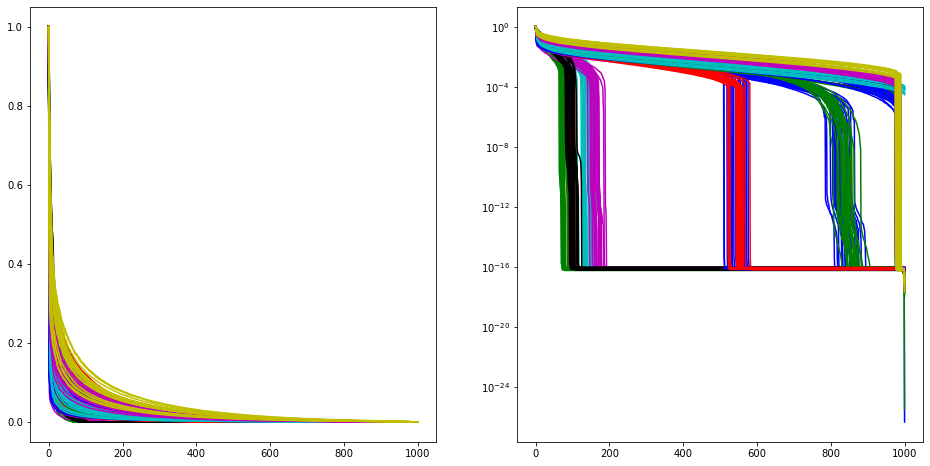

In [120]:
_,ax = py.subplots(ncols=2,figsize=[16,8])
for index, row in df.iterrows():
    for E in row['Es']:
        ax[0].plot((E/E[0]), colorMap[row['name']])
        ax[1].semilogy((E/E[0]), colorMap[row['name']])

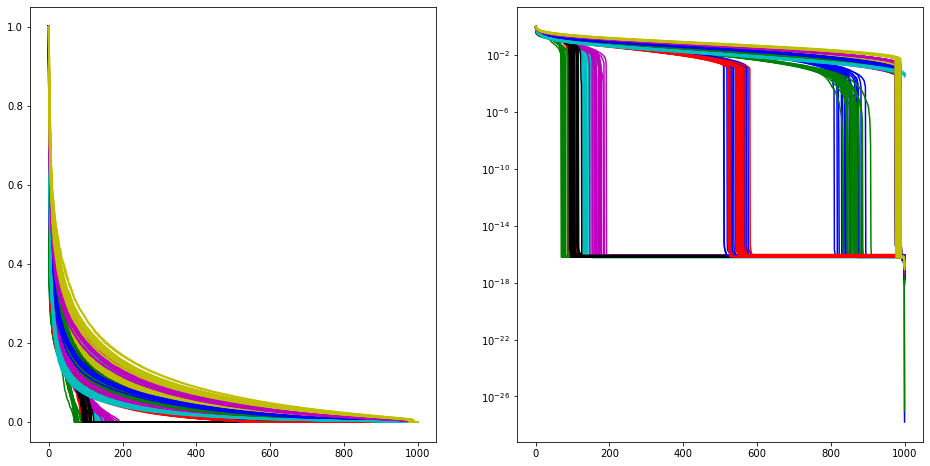

In [121]:
_,ax = py.subplots(ncols=2,figsize=[16,8])
for index, row in df.iterrows():
    for E in row['ENorms']:
        ax[0].plot((E/E[0]), colorMap[row['name']])
        ax[1].semilogy((E/E[0]), colorMap[row['name']])

# Averages 

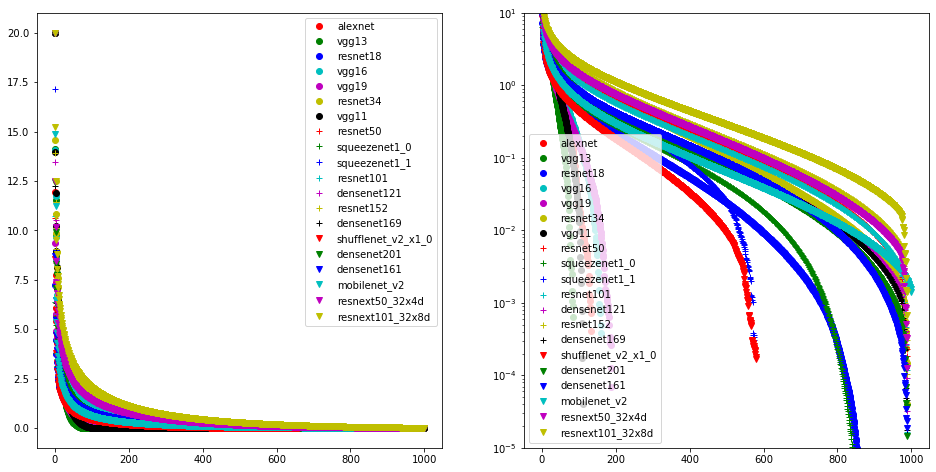

In [122]:
EAverage=collections.defaultdict(lambda : np.zeros(df['numCols'].iloc[0]))
for index, row in df.iterrows():
    for E in row['Es']:
        EAverage[row['name']] += E/E[0]

_,ax = py.subplots(ncols=2,figsize=[16,8])
for key in EAverage.keys():
    ax[0].plot(EAverage[key],colorMap[key]+markerMap[key])
    ax[1].semilogy(EAverage[key],colorMap[key]+markerMap[key])
    ax[1].set_ylim([1e-5,10])
ax[0].legend(EAverage.keys())
ax[1].legend(EAverage.keys())

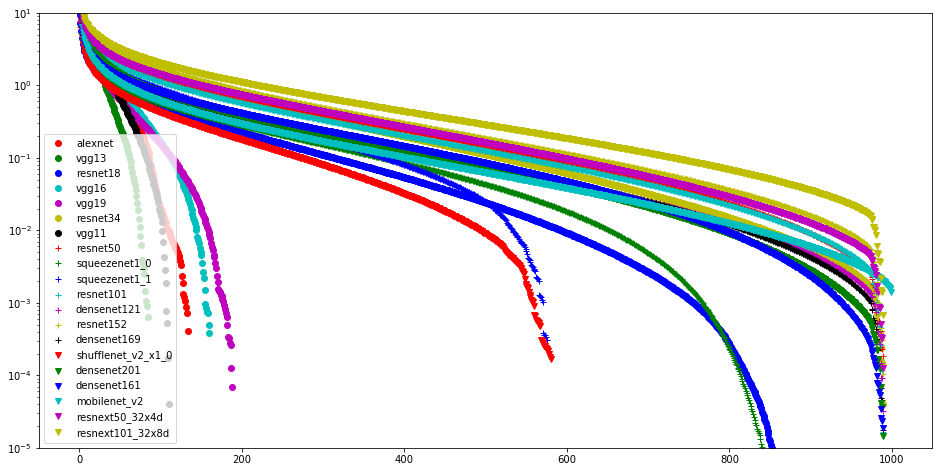

In [123]:
EAverage=collections.defaultdict(lambda : np.zeros(df['numCols'].iloc[0]))
for index, row in df.iterrows():
    for E in row['Es']:
        EAverage[row['name']] += E/E[0]

_,ax = py.subplots(ncols=1,figsize=[16,8])
for key in EAverage.keys():
#    ax.plot(EAverage[key],colorMap[key]+markerMap[key])
     ax.semilogy(EAverage[key],colorMap[key]+markerMap[key])
     ax.set_ylim([1e-5,10])
ax.legend(EAverage.keys())
# ax[1].legend(EAverage.keys())
py.savefig('NN_CSD_averages.png')

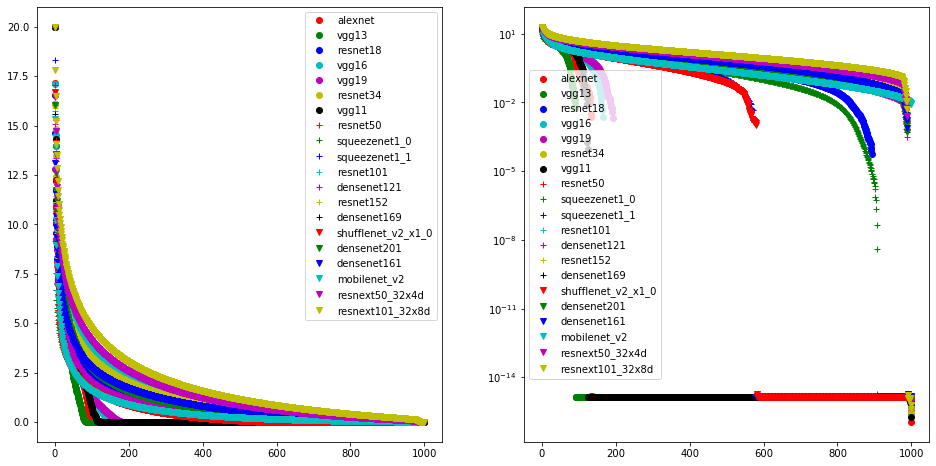

In [124]:
EAverage=collections.defaultdict(lambda : np.zeros(df['numCols'].iloc[0]))
for index, row in df.iterrows():
    for E in row['ENorms']:
        EAverage[row['name']] += E/E[0]

_,ax = py.subplots(ncols=2,figsize=[16,8])
for key in EAverage.keys():
    ax[0].plot(EAverage[key],colorMap[key]+markerMap[key])
    ax[1].semilogy(EAverage[key],colorMap[key]+markerMap[key])
ax[0].legend(EAverage.keys())
ax[1].legend(EAverage.keys())

# Measures of dimension 

In [125]:
def dimension(E):
    for i in range(len(E)):
        if np.sum(E[:i])/np.sum(E) > 0.9:
            return i        
        
def dimErrorPlot(df, namesToUse=None, namesToRemove=[], average=False, EType='ENorms',errorType='best1', plot=True):
    if plot:
        py.figure(figsize=(10,10))
    dims = []
    errors = []
    for index, row in df.iterrows():
        useName = True
        if not namesToUse is None:
            if not row['name'] in namesToUse:
                useName = False
        if row['name'] in namesToRemove:
            useName = False
        if useName:
            localDims = []
            localErrors = []
            for E in row[EType]:
                localDims += [dimension(E)]
                error = 100.-float(errorMap.loc[row['name']][errorType])
                localErrors += [error]
            if average:
                localDims = [np.average(localDims)]
                localErrors = [np.average(localErrors)]
            if plot:
                py.scatter(localDims, localErrors, color=colorMap[row['name']], marker=markerMap[row['name']], label=row['name'])
            dims += localDims
            errors += localErrors
    slope,intercept,rvalue,pvalue,stderr = scipy.stats.linregress(dims, errors)
    if plot:
        # lcolor = 'gray'
        sns.regplot(dims, errors, scatter=False, color = 'gray')
        #sns.regplot(dims, errors, scatter=False, color = 'g', joint_kws={'line_kws':{'color':lcolor}})
        # py.title('P-value %f Slope %f'%(pvalue,slope) )
        py.title('P-value %8.5f'%(pvalue,) )
        #sb.set()
        #sb.jointplot(x="efRankTaylor01", y="trainacc", data=a,  kind='reg',stat_func=p, color = 'g', joint_kws={'line_kws':{'color':lcolor}})
        #py.suptitle('Training accuracy vs Taylor effective rank 0.90')
        # plt.subplots_adjust(top=0.94)
        py.xlabel('Effective rank (10% cutoff)')
        py.ylabel('Testing accuracy (%)')
        py.grid()
        py.legend()
    return {'slope':slope, 'pvalue':pvalue}

In [126]:
tableData = []
for tag,namesToRemove in zip(['all','outliers removed'],[[],['alexnet','squeezenet1_0','squeezenet1_1']]):
    for EType in ['ENorms','Es']:
        for errorType in ['best1','best5']:
            myDict = dimErrorPlot(df, plot=False, namesToRemove=namesToRemove,average=True,EType=EType,errorType=errorType)
            myDict['tag'] = tag
            myDict['EType'] = EType
            myDict['errorType'] = errorType 
            tableData += [myDict]
for tag,namesToUse in zip(['resnet(18,34,50,101,152)'],[['resnet18','resnet34','resnet50','resnet101','resnet152']]):
    for EType in ['ENorms','Es']:
        for errorType in ['best1','best5']:
            myDict = dimErrorPlot(df, plot=False, namesToUse=namesToUse,average=True,EType=EType,errorType=errorType)
            myDict['tag'] = tag
            myDict['EType'] = EType
            myDict['errorType'] = errorType 
            tableData += [myDict]

In [127]:
print('Networks Used & Normalized & Error & P-value \\\\')
print('\midrule')
for row in tableData:
    if row['EType'] == 'Es':
        norm='No'
    else:
        norm='Yes'
    print('%s & %s & %s & %8.5f \\\\'%(row['tag'],norm,row['errorType'],row['pvalue']))

Networks Used & Normalized & Error & P-value \\
\midrule
all & Yes & best1 &  0.00598 \\
all & Yes & best5 &  0.01168 \\
all & No & best1 &  0.01572 \\
all & No & best5 &  0.02892 \\
outliers removed & Yes & best1 &  0.00020 \\
outliers removed & Yes & best5 &  0.00040 \\
outliers removed & No & best1 &  0.00014 \\
outliers removed & No & best5 &  0.00032 \\
resnet(18,34,50,101,152) & Yes & best1 &  0.00164 \\
resnet(18,34,50,101,152) & Yes & best5 &  0.00124 \\
resnet(18,34,50,101,152) & No & best1 &  0.00539 \\
resnet(18,34,50,101,152) & No & best5 &  0.00478 \\


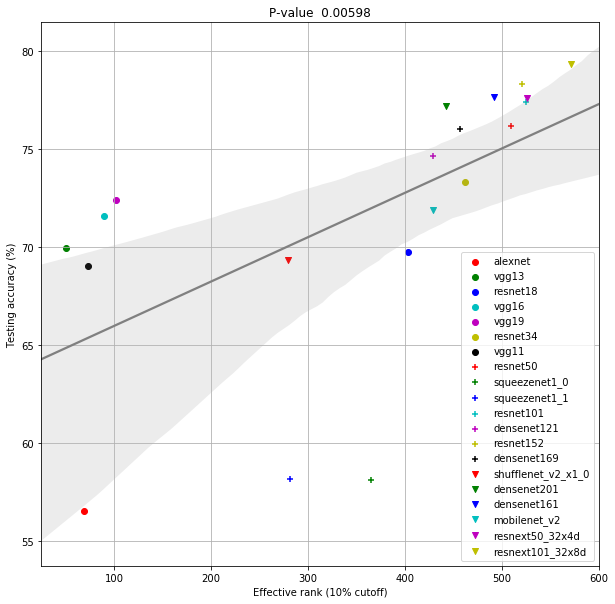

In [132]:
dimErrorPlot(df,average=True,EType='ENorms',errorType='best1')
py.savefig('comparison_all.png')

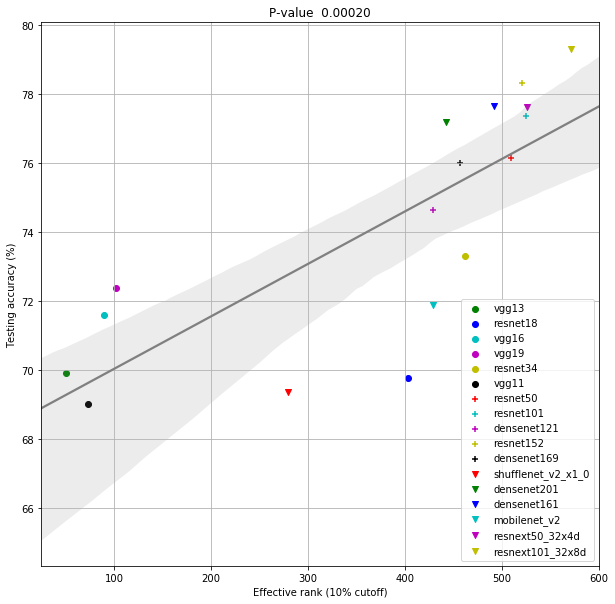

In [133]:
dimErrorPlot(df,namesToRemove=['alexnet','squeezenet1_0','squeezenet1_1'], average=True,EType='ENorms',errorType='best1')
py.savefig('comparison_good.png')

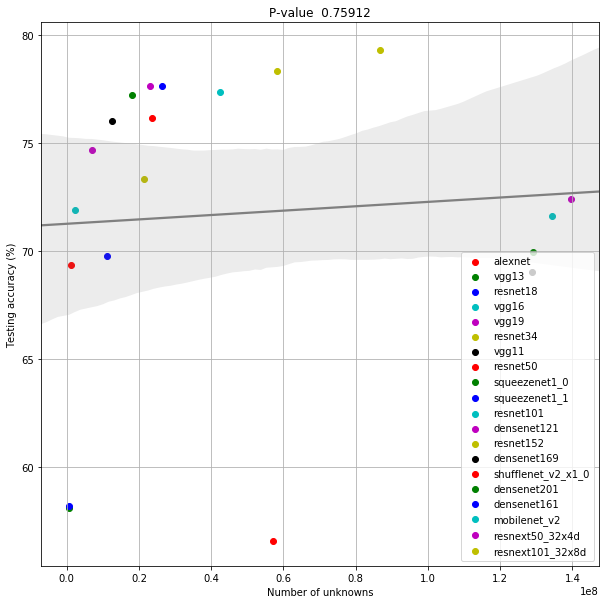

In [134]:
numThetas = []
errors = []
py.figure(figsize=(10,10))
for index, row in df.iterrows():
#for index, row in df.iterrows():
    numThetas += [row['numTheta']]
    error = 100.-float(errorMap.loc[row['name']]['best1'])
    errors += [error]
    py.scatter([row['numTheta']], [error], color=colorMap[row['name']], label=row['name'])
sns.regplot(numThetas, errors, scatter=False, color = 'gray')      
slope,intercept,rvalue,pvalue,stderr=scipy.stats.linregress(numThetas, errors)
py.title('P-value %8.5f'%(pvalue) )
py.legend()
py.grid()
py.xlabel('Number of unknowns')
py.ylabel('Testing accuracy (%)')
py.savefig('num_theta_all.png')

-1.877206927024635e-08 75.16027502528767 -0.2746955063091059 0.2859593391247123 1.6965957515150527e-08


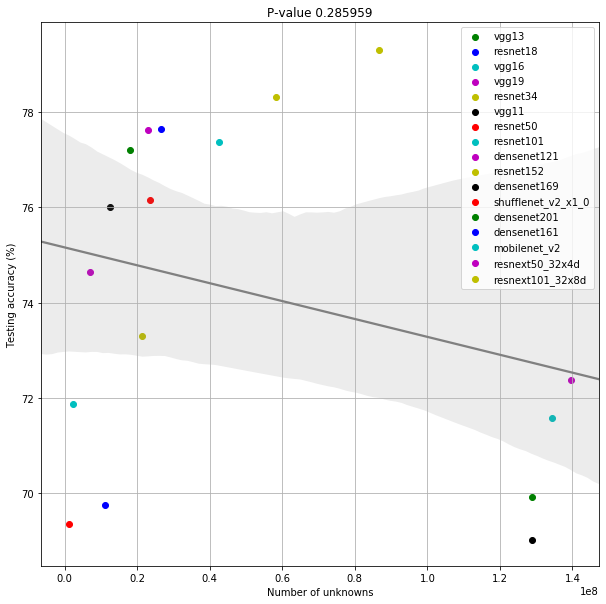

In [135]:
numThetas = []
errors = []
namesToRemove=['alexnet','squeezenet1_0','squeezenet1_1']
py.figure(figsize=(10,10))
for index, row in df.iterrows():
#for index, row in df.iterrows():
    useName = True
    if row['name'] in namesToRemove:
        useName = False
    if useName:
        numThetas += [row['numTheta']]
        error = 100.-float(errorMap.loc[row['name']]['best1'])
        errors += [error]
        py.scatter([row['numTheta']], [error], color=colorMap[row['name']], label=row['name'])
sns.regplot(numThetas, errors, scatter=False, color = 'gray')      
slope,intercept,rvalue,pvalue,stderr=scipy.stats.linregress(numThetas, errors)
print(slope,intercept,rvalue,pvalue,stderr)
py.title('P-value %f'%(pvalue) )
py.legend()
py.grid()
py.xlabel('Number of unknowns')
py.ylabel('Testing accuracy (%)')
py.savefig('num_theta_good.png')